In [719]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
path = "../../../synthetic_hr_dataset.csv"
df = pd.read_csv(path)

In [721]:
df.head()

employee_id  age  gender  years_at_company    job_role  monthly_income  \
0            1   56    Male                27     Finance         9449.85   
1            2   34    Male                 0     Finance         4969.72   
2            3   48    Male                19  Technology        12000.00   
3            4   46  Female                19  Healthcare        12000.00   
4            5   57    Male                 0     Finance        12669.11   

  work_life_balance job_satisfaction performance_rating  number_of_promotions  \
0              Fair              Low            Average                     8   
1              Fair        Very High            Average                     0   
2              Poor        Very High            Average                     5   
3              Poor             High            Average                     8   
4              Poor              Low            Average                     0   

   ... job_level  company_size remote_work leadership_opportunities  \
0  ...       Mid        Medium          No                       No   
1  ...     Entry        Medium         Yes                       No   
2  ...       Mid         Large         Yes                       No   
3  ...       Mid         Large         Yes                       No   
4  ...    Senior         Small          No                      Yes   

   innovation_opportunities company_reputation employee_recognition attrition  \
0                        No               Poor                  Low      Left   
1                       Yes               Good                  Low    Stayed   
2                       Yes               Good               Medium      Left   
3                       Yes               Good               Medium      Left   
4                        No               Fair               Medium      Left   

  age_groups age_before_working  
0        55+                 29  
1      26-35                 34  
2      46-55                 29  
3      46-55                 27  
4        55+                 57  

[5 rows x 25 columns]

In [722]:
df.isna().sum()

employee_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work_life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
age_groups                  0
age_before_working          0
dtype: int64

In [723]:
df.duplicated().sum()

np.int64(0)

In [724]:
len(df)

59000

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   employee_id               59000 non-null  int64  
 1   age                       59000 non-null  int64  
 2   gender                    59000 non-null  object 
 3   years_at_company          59000 non-null  int64  
 4   job_role                  59000 non-null  object 
 5   monthly_income            59000 non-null  float64
 6   work_life_balance         59000 non-null  object 
 7   job_satisfaction          59000 non-null  object 
 8   performance_rating        59000 non-null  object 
 9   number_of_promotions      59000 non-null  int64  
 10  overtime                  59000 non-null  object 
 11  distance_from_home        59000 non-null  int64  
 12  education_level           59000 non-null  object 
 13  marital_status            59000 non-null  object 
 14  number

In [726]:
df.describe()

employee_id           age  years_at_company  monthly_income  \
count  59000.000000  59000.000000      59000.000000    59000.000000   
mean   29500.500000     37.658814          6.668814     9997.811493   
std    17031.977278     11.119559          8.071488     5394.576910   
min        1.000000     18.000000          0.000000     2500.000000   
25%    14750.750000     29.000000          1.000000     5330.717500   
50%    29500.500000     37.000000          4.000000     9020.740000   
75%    44250.250000     46.000000          9.000000    12000.000000   
max    59000.000000     65.000000         39.000000    20000.000000   

       number_of_promotions  distance_from_home  number_of_dependents  \
count          59000.000000        59000.000000          59000.000000   
mean               1.500186           34.316305              1.290847   
std                1.961458           28.323980              1.378448   
min                0.000000            1.000000              0.000000   
25%                0.000000           10.000000              0.000000   
50%                1.000000           26.000000              1.000000   
75%                2.000000           52.000000              2.000000   
max                8.000000          100.000000              5.000000   

       age_before_working  
count        59000.000000  
mean            30.990000  
std              9.341746  
min             18.000000  
25%             24.000000  
50%             30.000000  
75%             37.000000  
max             65.000000

### Years at Company

In [727]:
df["years_at_company"].unique()

array([27,  0, 19,  3, 22, 25, 16, 39,  4, 10,  2, 33,  8, 13, 30,  1, 24,
        5, 14, 18,  6, 29,  7,  9, 20, 11, 26, 17, 34, 12, 35, 23, 21, 31,
       38, 15, 28, 36, 32, 37])

In [728]:
#The mode of the years at the company
df["years_at_company"].mode()

0    0
Name: years_at_company, dtype: int64

In [729]:
df["years_at_company"].value_counts()

years_at_company
0     9231
1     7942
2     6811
3     5480
4     4211
5     3671
6     2680
7     2328
8     1582
9     1567
10    1070
12    1018
11    1012
13     751
14     713
16     624
15     619
17     611
18     611
19     584
21     556
22     550
20     546
23     486
24     429
26     345
25     343
27     340
29     340
28     326
30     303
31     250
33     223
32     222
34     186
35     128
36     105
37      78
38      69
39      59
Name: count, dtype: int64

In [730]:
df.groupby(["attrition"])['years_at_company'].mean()

attrition
Left      6.342543
Stayed    6.860363
Name: years_at_company, dtype: float64

In [731]:
df.loc[df["attrition"] == "Left", "years_at_company"].mode()

0    0
Name: years_at_company, dtype: int64

In [732]:
df.loc[df["attrition"] == "Stayed", "years_at_company"].mode()

0    0
Name: years_at_company, dtype: int64

In [733]:
len(df.loc[(df["attrition"] == "Left") & (df["years_at_company"] > 5)])

7593

In [734]:
len(df.loc[(df["attrition"] == "Left") & (df["years_at_company"] < 5)])

12834

In [735]:
len(df.loc[(df["attrition"] == "Stayed") & (df["years_at_company"] > 5)])

14061

In [736]:
len(df.loc[(df["attrition"] == "Stayed") & (df["years_at_company"] < 5)])

20841

In [737]:
len(df[df["years_at_company"] > 5])

21654

In [738]:
len(df[df["years_at_company"] < 5])

33675

### Monthly Income

In [739]:
df["monthly_income"].describe()

count    59000.000000
mean      9997.811493
std       5394.576910
min       2500.000000
25%       5330.717500
50%       9020.740000
75%      12000.000000
max      20000.000000
Name: monthly_income, dtype: float64

In [740]:
df.groupby(["attrition"])["monthly_income"].mean()

attrition
Left       9499.551889
Stayed    10290.333775
Name: monthly_income, dtype: float64

In [741]:
income_mean = float(df["monthly_income"].describe()["mean"])
income_mean
income_min = float(df["monthly_income"].describe()["min"])


In [742]:
left_income_mean = float(df.groupby(["attrition"])["monthly_income"].mean()["Left"])
left_income_mean

9499.551889117984

In [743]:
df.groupby(["attrition"])["monthly_income"].median()

attrition
Left      8389.14
Stayed    9361.18
Name: monthly_income, dtype: float64

In [744]:
print(df.loc[(df["attrition"] == "Left"), "monthly_income"].min())
print(df.loc[(df["attrition"] == "Left"), "monthly_income"].max())

2500.0
20000.0


In [745]:
print(df.loc[(df["attrition"] == "Stayed"), "monthly_income"].min())
print(df.loc[(df["attrition"] == "Stayed"), "monthly_income"].max())

2500.0
20000.0


In [746]:
print(len(df.loc[(df["attrition"] == "Left") & (df["monthly_income"] < income_mean)]))
print(len(df.loc[(df["attrition"] == "Left") & (df["monthly_income"] > income_mean)]))

13124
8701


In [747]:
print(len(df.loc[(df["attrition"] == "Stayed") & (df["monthly_income"] < income_mean)]))
print(len(df.loc[(df["attrition"] == "Stayed") & (df["monthly_income"] > income_mean)]))

20095
17080


### Job Role

In [748]:
df["job_role"].unique()

array(['Finance', 'Technology', 'Healthcare', 'Education', 'Media'],
      dtype=object)

In [749]:
df["job_role"].value_counts()

job_role
Technology    14878
Healthcare    11816
Education     11806
Finance       11769
Media          8731
Name: count, dtype: int64

In [750]:
df.groupby(["attrition"])["job_role"].value_counts()

attrition  job_role  
Left       Technology    5630
           Healthcare    4628
           Finance       4232
           Education     4208
           Media         3127
Stayed     Technology    9248
           Education     7598
           Finance       7537
           Healthcare    7188
           Media         5604
Name: count, dtype: int64

### Work-life Balance

In [751]:
df.groupby(["work_life_balance"])["attrition"].value_counts()

work_life_balance  attrition
Excellent          Stayed        8045
                   Left           866
Fair               Left          9230
                   Stayed        8913
Good               Stayed       16305
                   Left          3138
Poor               Left          8591
                   Stayed        3912
Name: count, dtype: int64

In [752]:
print(len(df.loc[(df["attrition"] == "Left") & (df["work_life_balance"] == "Poor") & (df["monthly_income"] < income_mean)]))
print(len(df.loc[(df["attrition"] == "Left") & (df["work_life_balance"] == "Poor") & (df["monthly_income"] > income_mean)]))

5280
3311


In [753]:
df.groupby(["job_role"])["work_life_balance"].value_counts()

job_role    work_life_balance
Education   Good                 4011
            Fair                 3632
            Poor                 2392
            Excellent            1771
Finance     Good                 4045
            Fair                 3482
            Poor                 2323
            Excellent            1919
Healthcare  Fair                 3834
            Good                 3610
            Poor                 2759
            Excellent            1613
Media       Good                 2978
            Fair                 2595
            Poor                 1729
            Excellent            1429
Technology  Good                 4799
            Fair                 4600
            Poor                 3300
            Excellent            2179
Name: count, dtype: int64

In [754]:
df.groupby(["attrition", "job_role"])["work_life_balance"].value_counts()

attrition  job_role    work_life_balance
Left       Education   Fair                 1782
                       Poor                 1624
                       Good                  637
                       Excellent             165
           Finance     Fair                 1787
                       Poor                 1609
                       Good                  660
                       Excellent             176
           Healthcare  Fair                 2003
                       Poor                 1903
                       Good                  548
                       Excellent             174
           Media       Fair                 1277
                       Poor                 1208
                       Good                  508
                       Excellent             134
           Technology  Fair                 2381
                       Poor                 2247
                       Good                  785
                       Excel

### Job Satisfaction

In [755]:
df.job_satisfaction.unique()

array(['Low', 'Very High', 'High', 'Medium'], dtype=object)

In [756]:
df.job_satisfaction.value_counts()

job_satisfaction
High         18594
Medium       17867
Low          12581
Very High     9958
Name: count, dtype: int64

In [757]:
df.groupby(["job_satisfaction","gender"])["employee_id"].count()

job_satisfaction  gender
High              Female    9283
                  Male      9311
Low               Female    6412
                  Male      6169
Medium            Female    8900
                  Male      8967
Very High         Female    5027
                  Male      4931
Name: employee_id, dtype: int64

In [758]:
df.groupby(["job_satisfaction","attrition"])["employee_id"].count()

job_satisfaction  attrition
High              Left          3179
                  Stayed       15415
Low               Left          8685
                  Stayed        3896
Medium            Left          8934
                  Stayed        8933
Very High         Left          1027
                  Stayed        8931
Name: employee_id, dtype: int64

### Performance Rating

In [759]:
print(df.performance_rating.value_counts())
df.groupby(["performance_rating"])["number_of_promotions"].sum()

performance_rating
Average          30274
High             16502
Below Average     9353
Low               2871
Name: count, dtype: int64


performance_rating
Average          45178
Below Average    12421
High             27312
Low               3600
Name: number_of_promotions, dtype: int64

In [760]:
df.loc[(df["number_of_promotions"] > 0), "performance_rating"].value_counts()

performance_rating
Average          16573
High             10386
Below Average     4728
Low               1415
Name: count, dtype: int64

In [761]:
df.loc[(df["number_of_promotions"] == 0), "performance_rating"].value_counts()

performance_rating
Average          13701
High              6116
Below Average     4625
Low               1456
Name: count, dtype: int64

### Overtime

In [762]:
print(df.job_role.value_counts())
df.groupby(["overtime", "job_role"])["employee_id"].count()['Yes']

job_role
Technology    14878
Healthcare    11816
Education     11806
Finance       11769
Media          8731
Name: count, dtype: int64


job_role
Education     3822
Finance       3915
Healthcare    5061
Media         2881
Technology    6401
Name: employee_id, dtype: int64

In [763]:
df.groupby(["overtime", "attrition"])["employee_id"].count()

overtime  attrition
No        Left         10046
          Stayed       26874
Yes       Left         11779
          Stayed       10301
Name: employee_id, dtype: int64

### Job level

In [764]:
df.groupby([ "attrition","job_level", "performance_rating"])["employee_id"].count()

attrition  job_level  performance_rating
Left       Entry      Average               4696
                      Below Average         1753
                      High                  1910
                      Low                    618
           Mid        Average               4271
                      Below Average         1650
                      High                  1676
                      Low                    576
           Senior     Average               2379
                      Below Average         1029
                      High                   933
                      Low                    334
Stayed     Entry      Average               6579
                      Below Average         1692
                      High                  4209
                      Low                    452
           Mid        Average               7188
                      Below Average         1938
                      High                  4540
                      Low   

In [765]:
display(df.groupby([ "job_level","attrition"])["employee_id"].count())

job_level  attrition
Entry      Left          8977
           Stayed       12932
Mid        Left          8173
           Stayed       14188
Senior     Left          4675
           Stayed       10055
Name: employee_id, dtype: int64

In [766]:
# age = 48         years at company = 40        48 - 40 = 8         

In [767]:
df.loc[(df["years_at_company"] <= df["age"] -18)] #This data that we will be working on if the iqr did not make any sense

employee_id  age  gender  years_at_company    job_role  monthly_income  \
0                1   56    Male                27     Finance         9449.85   
1                2   34    Male                 0     Finance         4969.72   
2                3   48    Male                19  Technology        12000.00   
3                4   46  Female                19  Healthcare        12000.00   
4                5   57    Male                 0     Finance        12669.11   
...            ...  ...     ...               ...         ...             ...   
58995        58996   19  Female                 1     Finance         4429.35   
58996        58997   60    Male                33   Education        20000.00   
58997        58998   38  Female                 5  Technology        12000.00   
58998        58999   41    Male                 2   Education         5930.86   
58999        59000   30    Male                 5     Finance        20000.00   

      work_life_balance job_satisfaction performance_rating  \
0                  Fair              Low            Average   
1                  Fair        Very High            Average   
2                  Poor        Very High            Average   
3                  Poor             High            Average   
4                  Poor              Low            Average   
...                 ...              ...                ...   
58995              Fair           Medium               High   
58996         Excellent        Very High               High   
58997         Excellent             High            Average   
58998              Fair              Low               High   
58999              Good             High               High   

       number_of_promotions  ... job_level  company_size remote_work  \
0                         8  ...       Mid        Medium          No   
1                         0  ...     Entry        Medium         Yes   
2                         5  ...       Mid         Large         Yes   
3                         8  ...       Mid         Large         Yes   
4                         0  ...    Senior         Small          No   
...                     ...  ...       ...           ...         ...   
58995                     0  ...     Entry        Medium          No   
58996                     3  ...    Senior         Large         Yes   
58997                     2  ...       Mid        Medium         Yes   
58998                     0  ...     Entry         Large         Yes   
58999                     2  ...    Senior        Medium          No   

      leadership_opportunities  innovation_opportunities company_reputation  \
0                           No                        No               Poor   
1                           No                       Yes               Good   
2                           No                       Yes               Good   
3                           No                       Yes               Good   
4                          Yes                        No               Fair   
...                        ...                       ...                ...   
58995                      Yes                       Yes          Excellent   
58996                      Yes                       Yes               Good   
58997                       No                        No               Good   
58998                       No                        No               Good   
58999                       No                        No               Good   

      employee_recognition attrition age_groups age_before_working  
0                      Low      Left        55+                 29  
1                      Low    Stayed      26-35                 34  
2                   Medium      Left      46-55                 29  
3                   Medium      Left      46-55                 27  
4                   Medium      Left        55+                 57  
...                    ...       ...        ...  

### Distance from Home

In [768]:
df.distance_from_home.describe()

count    59000.000000
mean        34.316305
std         28.323980
min          1.000000
25%         10.000000
50%         26.000000
75%         52.000000
max        100.000000
Name: distance_from_home, dtype: float64

In [769]:
df.groupby(["job_role"])["distance_from_home"].describe()

count       mean        std  min   25%   50%   75%    max
job_role                                                               
Education   11806.0  29.497713  26.456680  1.0   8.0  21.0  44.0  100.0
Finance     11769.0  35.522729  28.541748  1.0  10.0  28.0  54.0  100.0
Healthcare  11816.0  27.360528  25.529133  1.0   8.0  19.0  41.0  100.0
Media        8731.0  38.750430  29.283391  1.0  12.0  33.0  61.0  100.0
Technology  14878.0  40.107743  29.289085  1.0  14.0  35.0  64.0  100.0

In [770]:
df.groupby(["attrition"])["distance_from_home"].describe()

count       mean        std  min   25%   50%   75%    max
attrition                                                             
Left       21825.0  34.721741  28.765519  1.0   9.0  26.0  54.0  100.0
Stayed     37175.0  34.078278  28.059182  1.0  10.0  26.0  51.0  100.0

In [771]:
df.groupby(["performance_rating"])["distance_from_home"].describe()

count       mean        std  min   25%   50%   75%  \
performance_rating                                                         
Average             30274.0  34.235053  28.345215  1.0  10.0  26.0  52.0   
Below Average        9353.0  34.327595  28.272735  1.0  10.0  26.0  51.0   
High                16502.0  34.386135  28.295014  1.0  10.0  26.0  52.0   
Low                  2871.0  34.734936  28.442921  1.0  10.0  26.0  53.0   

                      max  
performance_rating         
Average             100.0  
Below Average       100.0  
High                100.0  
Low                 100.0

### Education Level

### Marital Status

In [772]:
df.groupby(["marital_status", "remote_work"])["employee_id"].count()

marital_status  remote_work
Divorced        No              3445
                Yes             3166
Married         No             17469
                Yes            14667
Single          No             11310
                Yes             8943
Name: employee_id, dtype: int64

In [773]:
df.groupby(["marital_status", "gender", "remote_work"])["employee_id"].count()

marital_status  gender  remote_work
Divorced        Female  No             1781
                        Yes            1611
                Male    No             1664
                        Yes            1555
Married         Female  No             8723
                        Yes            7375
                Male    No             8746
                        Yes            7292
Single          Female  No             5666
                        Yes            4466
                Male    No             5644
                        Yes            4477
Name: employee_id, dtype: int64

In [774]:
df["remote_work"].value_counts()

remote_work
No     32224
Yes    26776
Name: count, dtype: int64

In [775]:
df.groupby(["marital_status", "attrition"])["employee_id"].count()

marital_status  attrition
Divorced        Left          2289
                Stayed        4322
Married         Left         11761
                Stayed       20375
Single          Left          7775
                Stayed       12478
Name: employee_id, dtype: int64

In [776]:
if "company_tenure" in df.columns:
    df.drop(columns="company_tenure", inplace=True)

In [777]:
df.groupby(["attrition", "leadership_opportunities"])["employee_id"].count()

attrition  leadership_opportunities
Left       No                          12595
           Yes                          9230
Stayed     No                          20259
           Yes                         16916
Name: employee_id, dtype: int64

In [778]:
df["leadership_opportunities"].value_counts()

leadership_opportunities
No     32854
Yes    26146
Name: count, dtype: int64

In [779]:
df.groupby(["attrition", "company_size"])["employee_id"].count()

attrition  company_size
Left       Large            6255
           Medium           8760
           Small            6810
Stayed     Large           11511
           Medium          14840
           Small           10824
Name: employee_id, dtype: int64

In [780]:
df["company_size"].value_counts()

company_size
Medium    23600
Large     17766
Small     17634
Name: count, dtype: int64

In [781]:
df.groupby(["company_size"])["years_at_company"].mean()

company_size
Large     6.740178
Medium    6.611441
Small     6.673699
Name: years_at_company, dtype: float64

In [782]:
df.groupby(["company_size", "overtime"])["employee_id"].count()

company_size  overtime
Large         No          11128
              Yes          6638
Medium        No          14781
              Yes          8819
Small         No          11011
              Yes          6623
Name: employee_id, dtype: int64

In [783]:
df.groupby(["attrition", "innovation_opportunities"])["employee_id"].count()

attrition  innovation_opportunities
Left       No                           9138
           Yes                         12687
Stayed     No                          15380
           Yes                         21795
Name: employee_id, dtype: int64

In [784]:
df["age_groups"] = df["age"].apply(lambda x: "18-25" if x <= 25 else ("26-35" if x <= 35 else ("36-45" if x <= 45 else ("46-55" if x <= 55 else "55+")))) 
df["age_groups"].value_counts()

age_groups
36-45    17845
26-35    17630
46-55    11799
18-25     8765
55+       2961
Name: count, dtype: int64

In [785]:
df.groupby(["age_groups", "job_level"]).size()

age_groups  job_level
18-25       Entry        8312
            Mid           453
26-35       Entry        9264
            Mid          6820
            Senior       1546
36-45       Entry        3768
            Mid          9448
            Senior       4629
46-55       Entry         565
            Mid          4732
            Senior       6502
55+         Mid           908
            Senior       2053
dtype: int64

In [786]:
df["age_before_working"] = df["age"] - df["years_at_company"]
df["age_before_working"].unique()

array([29, 34, 27, 57, 35, 18, 24, 26, 20, 42, 21, 25, 59, 37, 40, 60, 32,
       39, 31, 30, 23, 36, 33, 41, 22, 19, 50, 54, 55, 49, 52, 28, 38, 45,
       48, 43, 62, 46, 47, 51, 53, 44, 58, 61, 56, 63, 65, 64])

## Visualisation

/tmp/ipykernel_96965/3000317583.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



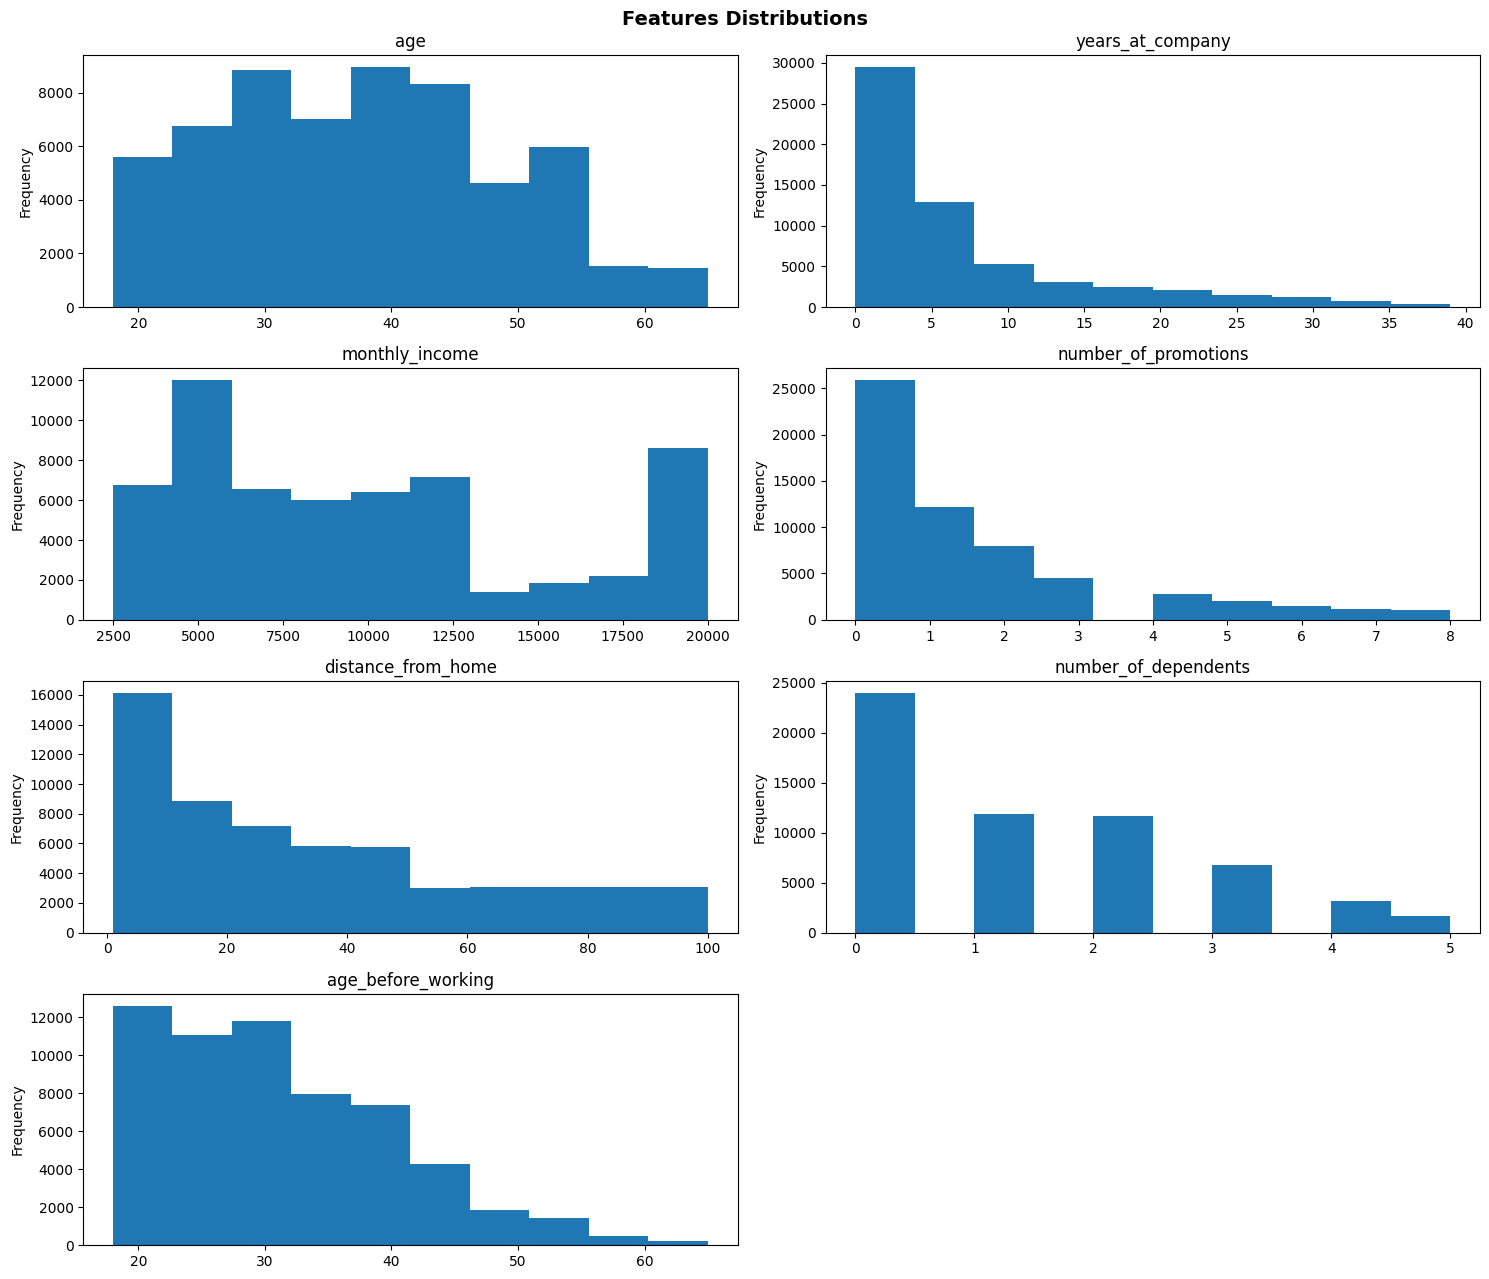

In [787]:
df_plotting =df.select_dtypes(include='number').drop(columns= ["employee_id"])
fig = plt.figure(figsize=(15, 13))
for i, column in enumerate(df_plotting.columns, 1):
    plt.subplot(4, 2, i)
    df[column].plot(kind='hist')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

/tmp/ipykernel_96965/1186003291.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



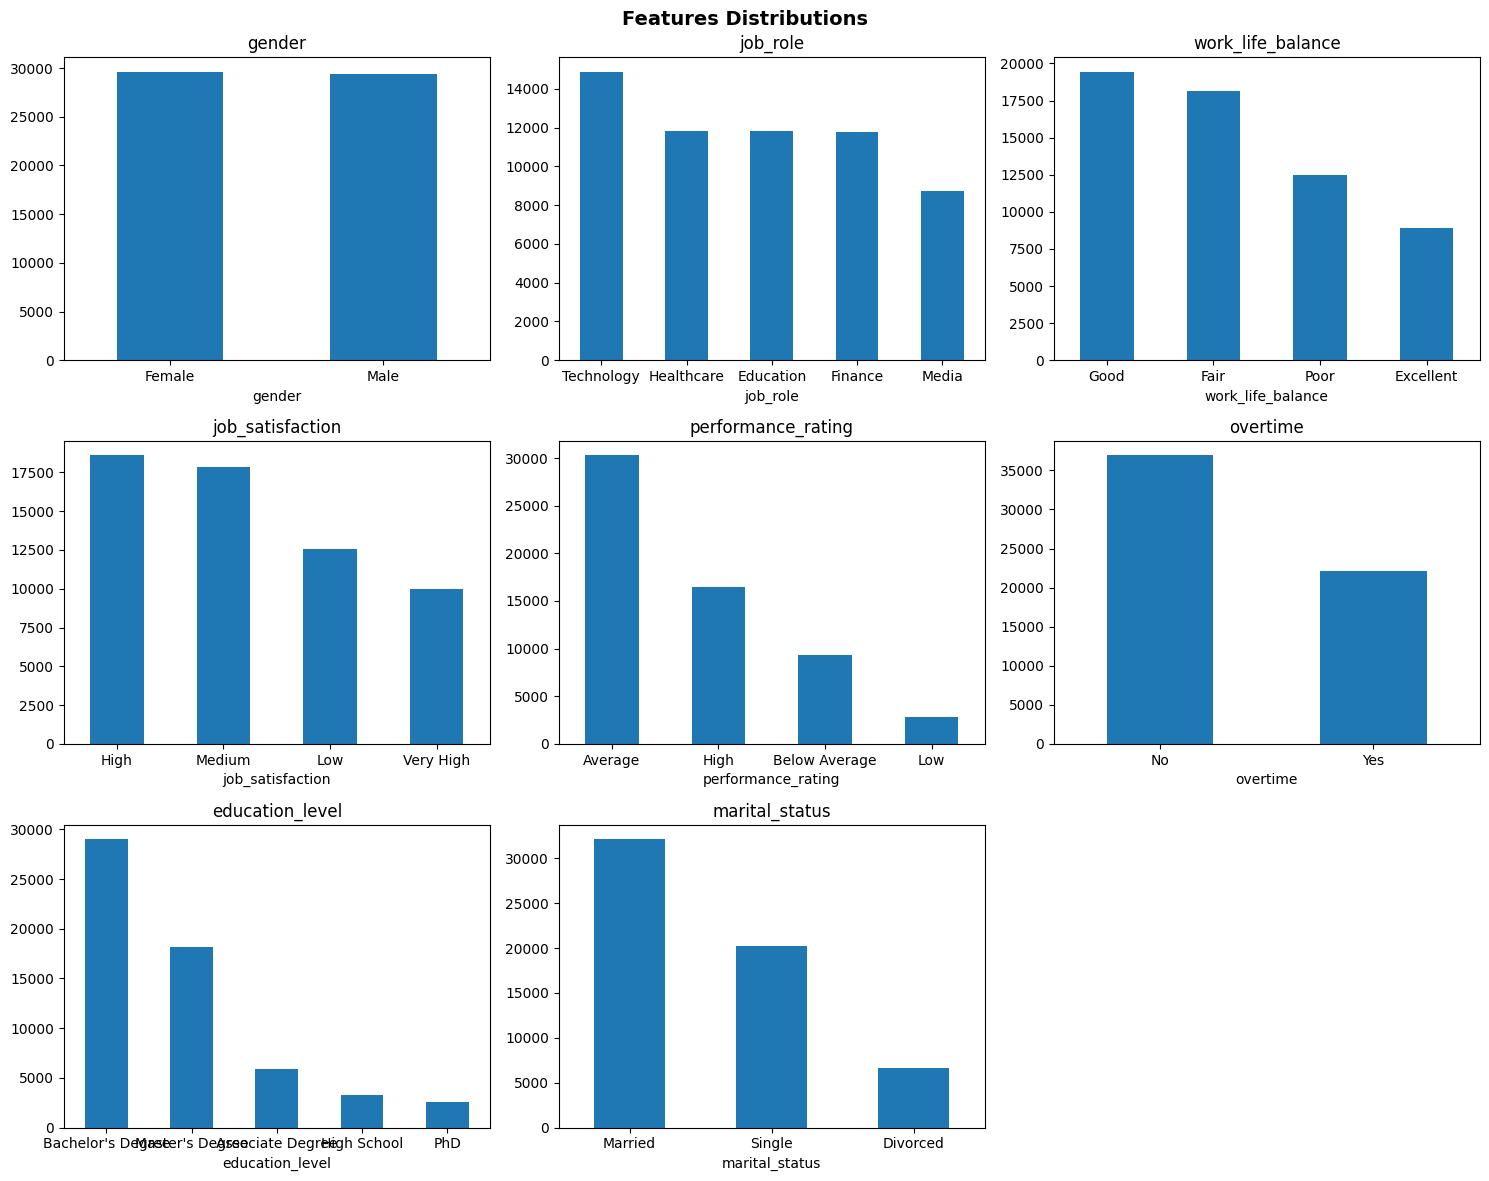

In [788]:
df_plotting =df.select_dtypes(include='object')
fig = plt.figure(figsize=(15, 12))
for i, column in enumerate(df_plotting.columns[0:8], 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

/tmp/ipykernel_96965/2582619470.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



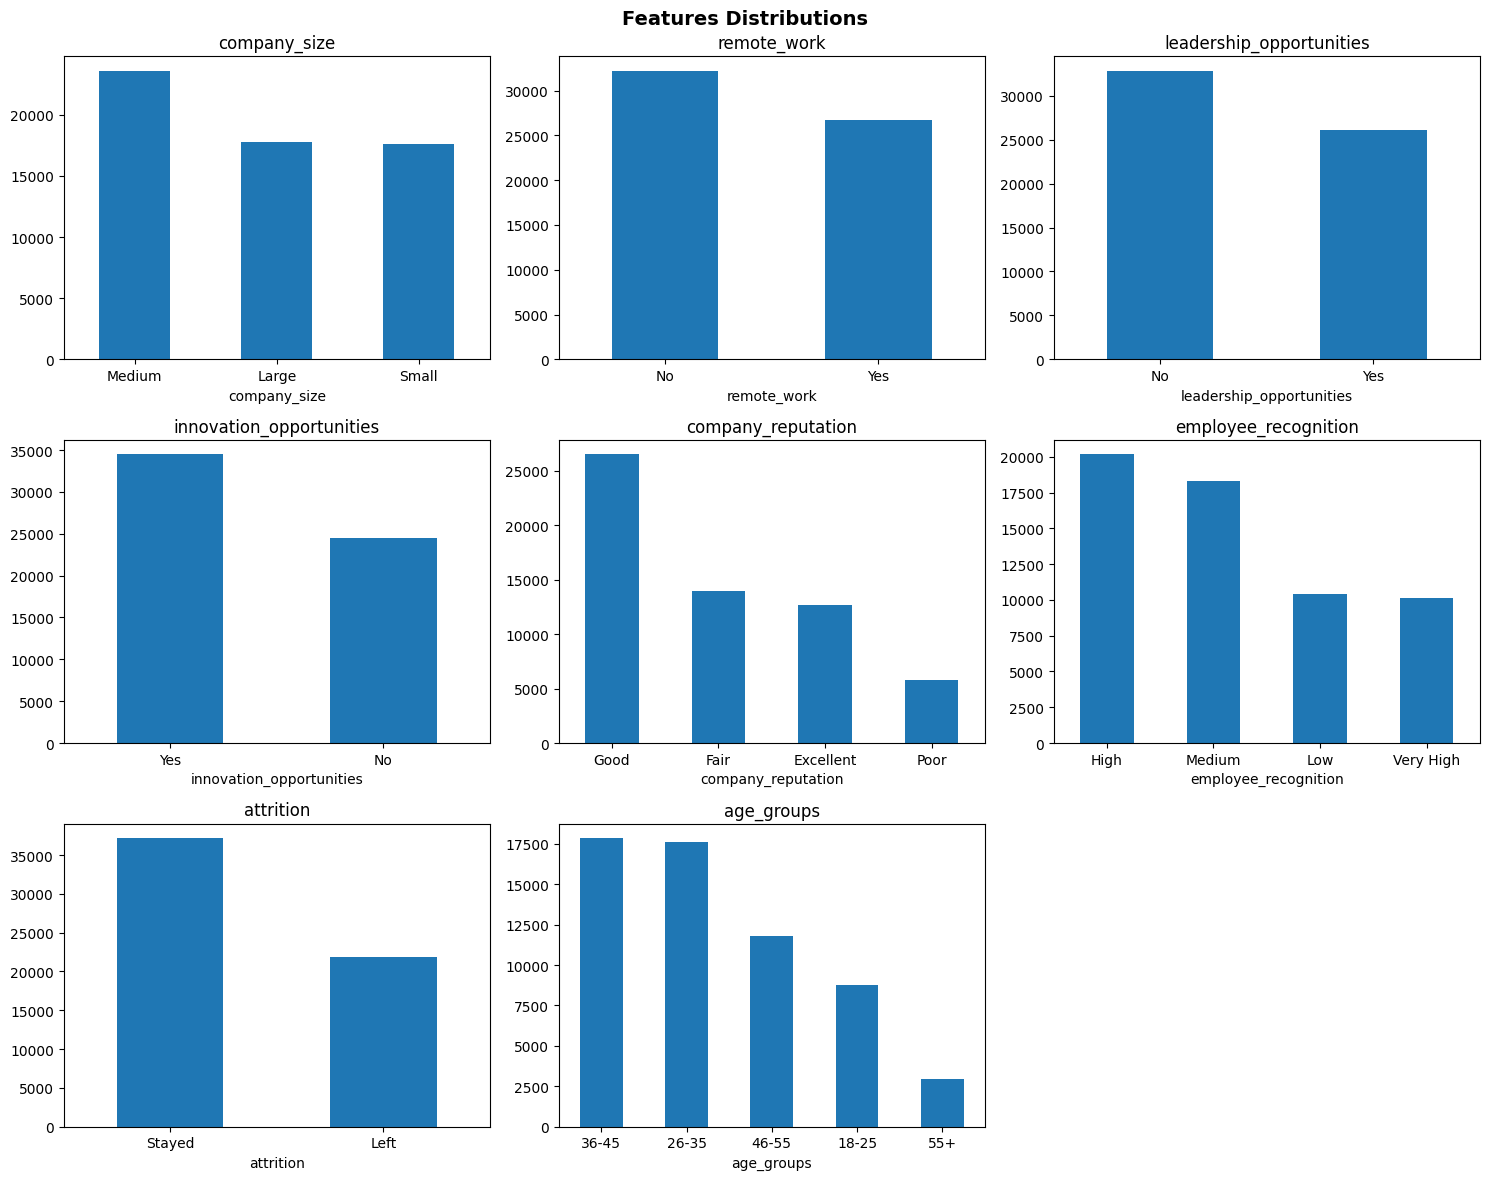

In [789]:
df_plotting =df.select_dtypes(include='object')
fig = plt.figure(figsize=(15, 12))
for i, column in enumerate(df_plotting.columns[9:], 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

#### Age

In [790]:
fig = px.histogram(df["age"])
fig.show()

#### Years at Compnay

In [791]:
fig = px.histogram(df["years_at_company"], labels= {"years_at_company": "Years at company"})
fig.show()

#### Monthly Income

In [792]:
fig = px.histogram(df["monthly_income"])
fig.show()

#### Overtime

In [793]:
jobRole_overtime = df.groupby(["overtime", "job_role"])["employee_id"].count().reset_index()
jobRole_overtime = jobRole_overtime.rename(columns={"employee_id": "count"})
fig = px.sunburst(
    jobRole_overtime,
    path=["overtime", "job_role"],  # hierarchy levels
    values="count",                 # size of each slice
    title="Job Role Distribution by Overtime"
)

fig.show()

In [794]:
fig = px.pie(df, names="age_groups", title="Age Groups")
fig.show()

In [795]:
# Select numeric columns (drop first column)
df_plotting = df.iloc[:, 1:].select_dtypes(include=["number"])

# Create a 2x4 subplot grid (adjust if you have more/less than 8 features)
rows, cols = 2, 4
fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=df_plotting.columns,
    horizontal_spacing=0.08,
    vertical_spacing=0.15
)

# Add each boxplot
for i, column in enumerate(df_plotting.columns):
    r = i // cols + 1
    c = i % cols + 1
    fig.add_trace(
        go.Box(
            y=df_plotting[column],
            name=column,
            boxmean='sd',
            marker_color='rgb(0, 128, 255)',
            fillcolor='rgba(0,128,255,0.3)',
            line=dict(color='rgb(0, 80, 180)'),
        ),
        row=r, col=c
    )

# Update layout for beauty
fig.update_layout(
    height=700,
    width=1200,
    title=dict(
        text="Boxplots of Numeric Features (Interactive & Styled)",
        x=0.5,
        font=dict(size=20, family="Arial", color="black")
    ),
    showlegend=False,
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(size=12),
)

fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.update_xaxes(showticklabels=False)

fig.show()


In [796]:
# import pandas as pd
# from sklearn.impute import KNNImputer

# # Step 1: Identify unrealistic values
# mask = df["years_at_company"] >= 40

# # Step 2: Temporarily set those to NaN (for KNN to fill in)
# df.loc[mask, "years_at_company"] = None

# # Step 3: Select numeric columns for KNN (so it has features to learn from)
# num_cols = df.select_dtypes(include="number").columns

# # Step 4: Initialize and apply the imputer
# imputer = KNNImputer(n_neighbors=5)
# df[num_cols] = imputer.fit_transform(df[num_cols])
# print(df["years_at_company"].describe())


In [797]:
# df["years_at_company"] = df.apply(
#     lambda row: 0 if row["age"] <= 16 else row["years_at_company"],
#     axis=1
# )


In [798]:
df

employee_id  age  gender  years_at_company    job_role  monthly_income  \
0                1   56    Male                27     Finance         9449.85   
1                2   34    Male                 0     Finance         4969.72   
2                3   48    Male                19  Technology        12000.00   
3                4   46  Female                19  Healthcare        12000.00   
4                5   57    Male                 0     Finance        12669.11   
...            ...  ...     ...               ...         ...             ...   
58995        58996   19  Female                 1     Finance         4429.35   
58996        58997   60    Male                33   Education        20000.00   
58997        58998   38  Female                 5  Technology        12000.00   
58998        58999   41    Male                 2   Education         5930.86   
58999        59000   30    Male                 5     Finance        20000.00   

      work_life_balance job_satisfaction performance_rating  \
0                  Fair              Low            Average   
1                  Fair        Very High            Average   
2                  Poor        Very High            Average   
3                  Poor             High            Average   
4                  Poor              Low            Average   
...                 ...              ...                ...   
58995              Fair           Medium               High   
58996         Excellent        Very High               High   
58997         Excellent             High            Average   
58998              Fair              Low               High   
58999              Good             High               High   

       number_of_promotions  ... job_level  company_size remote_work  \
0                         8  ...       Mid        Medium          No   
1                         0  ...     Entry        Medium         Yes   
2                         5  ...       Mid         Large         Yes   
3                         8  ...       Mid         Large         Yes   
4                         0  ...    Senior         Small          No   
...                     ...  ...       ...           ...         ...   
58995                     0  ...     Entry        Medium          No   
58996                     3  ...    Senior         Large         Yes   
58997                     2  ...       Mid        Medium         Yes   
58998                     0  ...     Entry         Large         Yes   
58999                     2  ...    Senior        Medium          No   

      leadership_opportunities  innovation_opportunities company_reputation  \
0                           No                        No               Poor   
1                           No                       Yes               Good   
2                           No                       Yes               Good   
3                           No                       Yes               Good   
4                          Yes                        No               Fair   
...                        ...                       ...                ...   
58995                      Yes                       Yes          Excellent   
58996                      Yes                       Yes               Good   
58997                       No                        No               Good   
58998                       No                        No               Good   
58999                       No                        No               Good   

      employee_recognition attrition age_groups age_before_working  
0                      Low      Left        55+                 29  
1                      Low    Stayed      26-35                 34  
2                   Medium      Left      46-55                 29  
3                   Medium      Left      46-55                 27  
4                   Medium      Left        55+                 57  
...                    ...       ...        ...  

In [799]:
# df["age_before_working"] = df["age"] - df["years_at_company"]

In [800]:
# df = df[(df["age"] - df["years_at_company"]) >= 16]

In [801]:
# Select numeric columns (drop first column)
df_plotting = df.iloc[:, 1:].select_dtypes(include=["number"])

# Create a 2x4 subplot grid (adjust if you have more/less than 8 features)
rows, cols = 2, 4
fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=df_plotting.columns,
    horizontal_spacing=0.08,
    vertical_spacing=0.15
)

# Add each boxplot
for i, column in enumerate(df_plotting.columns):
    r = i // cols + 1
    c = i % cols + 1
    fig.add_trace(
        go.Box(
            y=df_plotting[column],
            name=column,
            boxmean='sd',
            marker_color='rgb(0, 128, 255)',
            fillcolor='rgba(0,128,255,0.3)',
            line=dict(color='rgb(0, 80, 180)'),
        ),
        row=r, col=c
    )

# Update layout for beauty
fig.update_layout(
    height=700,
    width=1200,
    title=dict(
        text="Boxplots of Numeric Features (Interactive & Styled)",
        x=0.5,
        font=dict(size=20, family="Arial", color="black")
    ),
    showlegend=False,
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(size=12),
)

# Make axis labels prettier
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.update_xaxes(showticklabels=False)

fig.show()


In [802]:
df["attrition"] = np.where(df["attrition"] == "Left", 1, 0)

In [803]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Compute correlation matrix
corr = df_numeric.corr(method= "pearson")

# Create Plotly heatmap
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    origin='lower',
    title="📊 Correlation Matrix (Plotly)"
)

# Beautify layout
fig.update_layout(
    title_x=0.5,
    width=800,
    height=700,
    coloraxis_colorbar=dict(title="Correlation"),
    font=dict(size=12),
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show()


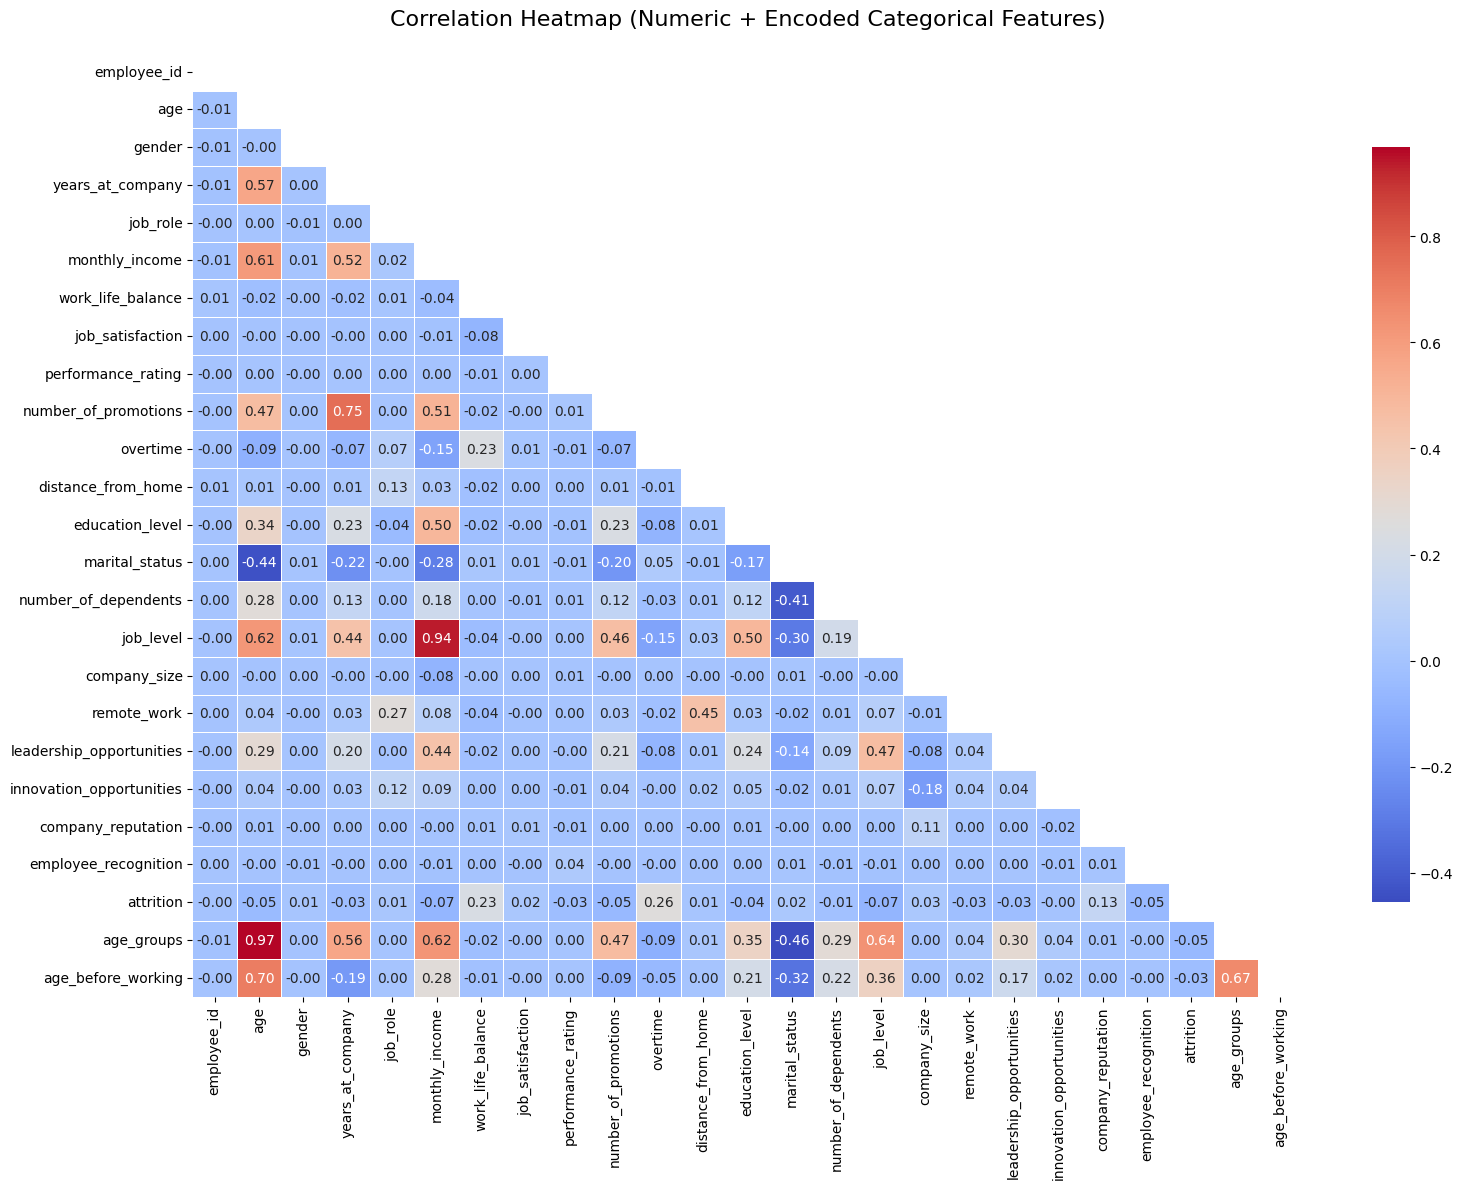

In [804]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === Load your dataset ===
# Replace with your actual file name

# === Encode categorical features ===
# Convert all categorical columns to numeric codes (Label Encoding)
# This preserves correlation calculation logic
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = df[col].astype('category').cat.codes

# === Compute correlation matrix ===
corr_matrix = df.corr(numeric_only=True)

# === Create a mask for upper triangle (optional, for clarity) ===
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# === Plot the heatmap ===
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Numeric + Encoded Categorical Features)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [805]:
import pandas as pd
from scipy.stats import pointbiserialr
from sklearn.feature_selection import mutual_info_classif

target_col = 'attrition'  # change this

numeric_cols = df.select_dtypes(include=['number']).columns.drop(target_col)

results = []

# Point-biserial correlation
for col in numeric_cols:
    r, p = pointbiserialr(df[target_col], df[col])
    results.append({'Feature': col, 'Correlation': r, 'P-value': p})

relation_df = pd.DataFrame(results)

# Mutual information
mi = mutual_info_classif(df[numeric_cols], df[target_col], random_state=0)
relation_df['Mutual Information'] = mi

# Sort by importance
relation_df = relation_df.sort_values(by='Mutual Information', ascending=False)

print(relation_df)

                     Feature  Correlation        P-value  Mutual Information
6          work_life_balance     0.225386   0.000000e+00            0.126381
7           job_satisfaction     0.022898   2.659222e-08            0.118651
10                  overtime     0.261987   0.000000e+00            0.035615
8         performance_rating    -0.028553   4.010135e-12            0.015526
20        company_reputation     0.132941  8.916480e-231            0.014819
21      employee_recognition    -0.049760   1.136845e-33            0.011219
19  innovation_opportunities    -0.004874   2.364698e-01            0.008529
17               remote_work    -0.025869   3.290607e-10            0.005999
9       number_of_promotions    -0.049840   8.967711e-34            0.005878
15                 job_level    -0.074237   6.991796e-73            0.005763
14      number_of_dependents    -0.013747   8.403186e-04            0.005531
18  leadership_opportunities    -0.031224   3.302714e-14            0.004872

In [806]:
df.to_csv("../../data/preprocessed_data/data_after_preprocessing.csv")

OSError: Cannot save file into a non-existent directory: '../../data/preprocessed_data'